In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd 'gdrive/MyDrive/Colab Notebooks/PIIA/References/predictions_types/'
!ls

/content/gdrive/MyDrive/Colab Notebooks/PIIA/References/predictions_types
dataset  Predictions.ipynb


In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [3]:
path = 'dataset/Infected.csv'
ds = pd.read_csv(path, index_col=0)
ds.head(18)

,num_of_date,num_of_patients,Date_test,num_of_date_test,num_of_patients_test
Date,,,,,
2020-01-21,1,1,2020-02-05,16.0,11.0
2020-01-22,2,1,2020-02-16,27.0,13.0
2020-01-23,3,1,2020-02-22,33.0,15.0
2020-01-24,4,2,2020-02-27,38.0,58.0
2020-01-25,5,2,2020-03-03,43.0,118.0
2020-01-26,6,5,2020-03-05,45.0,217.0
2020-01-27,7,5,2020-03-12,52.0,1663.0
2020-01-28,8,5,2020-03-23,63.0,43847.0
2020-01-29,9,5,2020-03-30,70.0,161807.0


In [5]:
x = ds['num_of_date']
y = ds['num_of_patients']
x_test_patient = ds['num_of_date_test'][:12]  # data for the officiel test
y_test_patient = ds['num_of_patients_test'][:12]

In [6]:
x

Date
2020-01-21     1
2020-01-22     2
2020-01-23     3
2020-01-24     4
2020-01-25     5
              ..
2020-04-21    91
2020-04-22    92
2020-04-23    93
2020-04-24    94
2020-04-25    95
Name: num_of_date, Length: 83, dtype: int64

##Linear Regression

In [7]:
yy = np.log10(y)

scores = []

In [8]:
yy

Date
2020-01-21    0.000000
2020-01-22    0.000000
2020-01-23    0.000000
2020-01-24    0.301030
2020-01-25    0.301030
                ...   
2020-04-21    5.842530
2020-04-22    5.858897
2020-04-23    5.875226
2020-04-24    5.882302
2020-04-25    5.896655
Name: num_of_patients, Length: 83, dtype: float64

In [9]:
Linear_Regression = LinearRegression()  

In [10]:
print(KFold.__doc__[:1070])
cv = KFold(n_splits=10, random_state=1, shuffle=True)  # helps to separate the dataset in training and testing
separated = cv.split(x)
print(next(separated))
print(next(separated))
print(next(separated))
print(next(separated))
print(next(separated))
# we can do this 10 times

K-Folds cross-validator

    Provides train/test indices to split data in train/test sets. Split
    dataset into k consecutive folds (without shuffling by default).

    Each fold is then used once as a validation while the k - 1 remaining
    folds form the training set.

    Read more in the :ref:`User Guide <k_fold>`.

    Parameters
    ----------
    n_splits : int, default=5
        Number of folds. Must be at least 2.

        .. versionchanged:: 0.22
            ``n_splits`` default value changed from 3 to 5.

    shuffle : bool, default=False
        Whether to shuffle the data before splitting into batches.
        Note that the samples within each split will not be shuffled.

    random_state : int, RandomState instance or None, default=None
        When `shuffle` is True, `random_state` affects the ordering of the
        indices, which controls the randomness of each fold. Otherwise, this
        parameter has no effect.
        Pass an int for reproducible output across 

In [11]:
for train_index, test_index in cv.split(x):
    X_train, X_test, y_train, y_test , yy_train, yy_test= x[train_index], x[test_index], y[train_index], y[test_index], yy[train_index], yy[test_index]
    Linear_Regression.fit(X_train.values.reshape(-1,1), yy_train)
    scores.append(Linear_Regression.score(X_test.values.reshape(-1,1), yy_test))

In [12]:
print("Average score for Linear Regression:", sum(scores) / len(scores)) 

Average score for Linear Regression: 0.947731350509466


### Evaluation model

In [13]:
x.values.reshape(-1,1)[0], x.values.reshape(-1,1)[1]   # transpose matrix

(array([1]), array([2]))

In [29]:
x.values.reshape(-1,1)[-1]  # the last datetime is 95

array([95])

In [25]:
yy

Date
2020-01-21    0.000000
2020-01-22    0.000000
2020-01-23    0.000000
2020-01-24    0.301030
2020-01-25    0.301030
                ...   
2020-04-21    5.842530
2020-04-22    5.858897
2020-04-23    5.875226
2020-04-24    5.882302
2020-04-25    5.896655
Name: num_of_patients, Length: 83, dtype: float64

In [27]:
#  Train the model with logaritmi values
Linear_Regression.fit(x.values.reshape(-1, 1), yy)  # use log data y

In [ ]:
y_test_patient_log = np.log10(y_test_patient)  # calcule log of y_test oficial
evaluation_1 = Linear_Regression.predict(x_test_patient.values.reshape(-1, 1))
score = Linear_Regression.score(x_test_patient.values.reshape(-1, 1), y_test_patient_log)

In [36]:
print("Final Evaluation Score for Linear Regression :", score * 100, "%")

Final Evaluation Score for Linear Regression : 93.03292029481322 %


###Prediction for new days

In [30]:
# the last datetime is 95, so :
x_prediction = [[95],[96],[97],[98],[99],[100],[101]]  # matrix like a vector

In [31]:
print('Evaluation for expecting 6 days in future in Linear_Regression:')
for predict in x_prediction:
  print('day', predict, '=', int(10 ** Linear_Regression.predict([predict])))

Evaluation for expecting 6 days in future in Linear_Regression:
day [95] = 2750230
day [96] = 3242796
day [97] = 3823580
day [98] = 4508382
day [99] = 5315832
day [100] = 6267896
day [101] = 7390475


###Plot the info

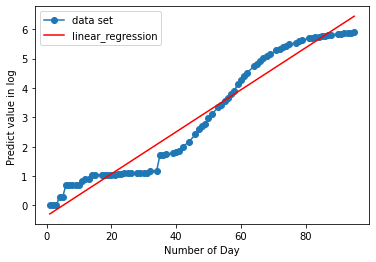

In [37]:
predicted1 = Linear_Regression.predict(x.values.reshape(-1, 1))
predicted11 = 10 ** Linear_Regression.predict(x.values.reshape(-1,1))
plt.plot(x, yy, 'o-', label='data set')
plt.plot(x, predicted1, c='#ff0000', label='linear_regression')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in log ')
plt.show()

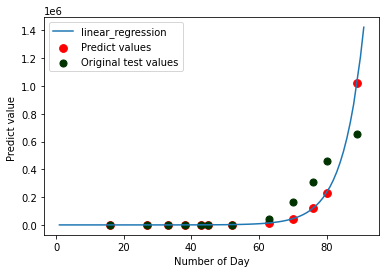

In [34]:
plt.plot(x[:79], predicted11[:79],label='linear_regression')
plt.scatter(x_test_patient, 10 ** evaluation_1, s=60, c='#ff0000', label='Predict values')
plt.scatter(x_test_patient, y_test_patient, s=50, c='#003300', label='Original test values')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value ')
plt.show()